<h1 align=center>Assignment  47: EDA 1</h1>

---------

# Question 1 : What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.

## Answer :

### The wine quality data set contains information on the physicochemical properties of various red and white wines, as well as their quality ratings as assessed by human tasters. Some of the key features of the data set include:

- volatile acidity :   Volatile acidity is the gaseous acids present in wine.
- fixed acidity :   Primary fixed acids found in wine are tartaric, succinic, citric, and malic
- residual sugar :   Amount of sugar left after fermentation.
- citric acid :    It is weak organic acid, found in citrus fruits naturally.
- chlorides :   Amount of salt present in wine.
- free sulfur dioxide :   So2 is used for prevention of wine by oxidation and microbial spoilage.
- total sulfur dioxide 
- pH :   In wine pH is used for checking acidity
- density 
- sulphates :    Added sulfites preserve freshness and protect wine from oxidation, and bacteria.
- alcohol :   Percent of alcohol present in wine.

Each of these features plays an important role in predicting the quality of wine. For example, a higher acidity level can contribute to a crisper, more refreshing taste, while a higher alcohol content can result in a richer, fuller-bodied wine. By analyzing these various features, winemakers and tasters can gain insight into the characteristics of different wines and make informed decisions about their quality and composition.

In [47]:
import pandas as pd
import numpy as np 

#Load The Dataset 
wine_df = pd.read_csv('https://raw.githubusercontent.com/neerajprasad209/Dataset/main/wine%2Bquality/winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [49]:
# seperating X and Y 
X = wine_df.drop(labels=['quality'],axis=1)
Y = wine_df[['quality']]

In [50]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [51]:
Y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [52]:
## Find Feature Importance with Mutual Info

from sklearn.feature_selection import mutual_info_classif
mif_score = mutual_info_classif(X,Y.values.flatten(),random_state=21)
mif_score = pd.Series(mif_score,name='MI_score',index=X.columns)
mif_score = mif_score.sort_values(ascending=False)

<Axes: >

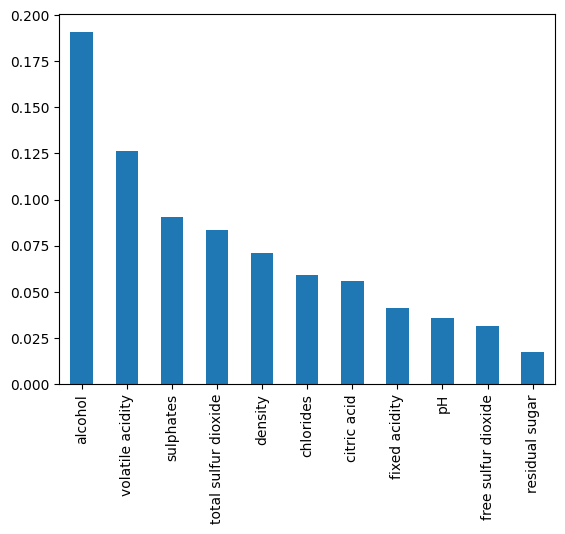

In [53]:
mif_score.plot(kind='bar')

### Observations : Alcohol, Volatile Acidity and Sulphates are top 3 features in the dataset

# Question 2 : How did you handle missing data in the wine quality data set during the feature engineering process? Discuss the advantages and disadvantages of different imputation techniques.

## Answer :

In [54]:
# Read the Dataset 
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
# Checking the Info
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [56]:
# Checking the Null values present in the Dataset
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Observation : Wine Quality does not have missing values in the dataset

In [57]:
# Checking the Percentage of the missing values present in the dataset

wine_df.isnull().mean() * 100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

### In this dataset if missing values was present then 
- If it was below the 5% then we simply remove the null value.  
- And if null value is above 5% then we simply use simpleimputer with mean or median.

### Missing data is a common problem in real-world datasets, and handling missing data is an important step in the data preprocessing and feature engineering process. Here are some common techniques for handling missing data:

1. `Mean/median imputation`: In this technique, missing values are replaced with the mean or median value of the corresponding feature. This technique is simple and easy to implement, and can work well if the missing values are not too numerous. However, it can also introduce bias if the missing values are not missing at random, and it can reduce the variance of the data.

2. `Mode imputation`: In this technique, missing values are replaced with the mode value of the corresponding feature. This technique works well for categorical variables and can be useful if the most common value is a good approximation of the missing value. However, it can also introduce bias if the missing values are not missing at random.

3. `K-nearest neighbor imputation`: In this technique, missing values are replaced with the values of the nearest k-neighbors in the dataset. This method can work well if the missing data is not too extensive and the dataset has a clear underlying structure. However, it can also introduce bias if the nearest neighbors are not truly similar.

4. `Iterative imputation`: In this technique, missing values are imputed by modeling the missing values as a function of other variables in the dataset. Multiple iterations are performed to refine the imputed values, with each iteration using the imputed values from the previous iteration as input. This technique can be effective if the missing data is not too extensive and can be modeled using other variables in the dataset. It can also provide a measure of uncertainty for the imputed values. However, it can be computationally expensive and requires a good understanding of the underlying data structure.

### In general, the choice of imputation technique depends on the nature and extent of the missing data, as well as the characteristics of the dataset. It is important to carefully consider the advantages and disadvantages of each technique before choosing an approach.

# Question 3 : What are the key factors that affect students' performance in exams? How would you go about analyzing these factors using statistical techniques?

In [66]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/neerajprasad209/Dataset/main/StudentsPerformance.csv')


In [67]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


### My approach to analyzing factors that affect students' performance in exams as follows:

1. `Gender`: Previous research has shown that gender can impact students' academic performance. You could analyze the relationship between gender and exam performance using a t-test or ANOVA to compare the mean exam scores of male and female students.

2. `Race/ethnicity`: Similar to gender, race/ethnicity can also impact students' academic performance. You could analyze the relationship between race/ethnicity and exam performance using a similar approach as for gender.

3. `Parental level of education`: Students whose parents have a higher level of education may have better study habits and support systems that contribute to their academic success. You could analyze the relationship between parental level of education and exam performance using a correlation analysis or multiple regression.

4. `Lunch`: Students who receive free or reduced-price lunches may face additional challenges that impact their academic performance. You could analyze the relationship between lunch status and exam performance using a t-test or ANOVA to compare the mean exam scores of students who receive free or reduced-price lunches versus those who do not.

5. `Test preparation course`: Students who take test preparation courses may perform better on exams due to improved study strategies and test-taking skills. You could analyze the relationship between test preparation course enrollment and exam performance using a t-test or ANOVA to compare the mean exam scores of students who took the course versus those who did not.

6. `Math, reading, and writing scores`: These three variables represent the individual subject scores of students on their exams. You could analyze the relationship between these variables and exam performance using correlation analyses or multiple regression.

7. `Total score`: This variable represents the combined score of all three subjects on the exam. You could analyze the relationship between total score and the other variables using a multiple regression.

### Overall, there are a variety of statistical techniques that could be used to analyze the factors that impact students' performance on exams, including t-tests, ANOVAs, correlation analyses, and multiple regression. The choice of technique(s) would depend on the research questions and the specific variables of interest.

In [74]:
import numpy as np 
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# printing top 5 rows of Student Performance dataset
print('Top 5 rows of Student Performance Dataset')
print(df.head())
print('\n==========================================================================\n')

# Define Categorical Column with target
cat_cols = list(df.select_dtypes(include='object').columns)
new_cols = cat_cols +['total_score']

# defin the model Formula
model_formula = "total_score ~ C(gender) + C(race_ethnicity) + C(parental_level_of_education) + C(lunch)  + C(test_preparation_course)"

# Fit the model using OLS Regression 
model = ols(model_formula,df[new_cols]).fit()

print("ANOVA Table:")
print(anova_lm(model,typ=2))

Top 5 rows of Student Performance Dataset
   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  
0          218  
1          247  
2          278  
3          148  
4          229  


ANOVA 

### Assuming alpha = 0.05
### All Variables in above have p-value < 0.05
### Hence we reject the null hypothesis.
### Conclusion : Total Score is dependent on Gender, Race Ethnicity , parental level of education, lunch and test preperation score

### For Numerical variables i can perform correlation analysis

In [75]:
stud_corr = df.corr(numeric_only=True)
stud_corr

,math_score,reading_score,writing_score,total_score
math_score,1.000000,0.817580,0.802642,0.918746
reading_score,0.817580,1.000000,0.954598,0.970331
writing_score,0.802642,0.954598,1.000000,0.965667
total_score,0.918746,0.970331,0.965667,1.000000


<Axes: >

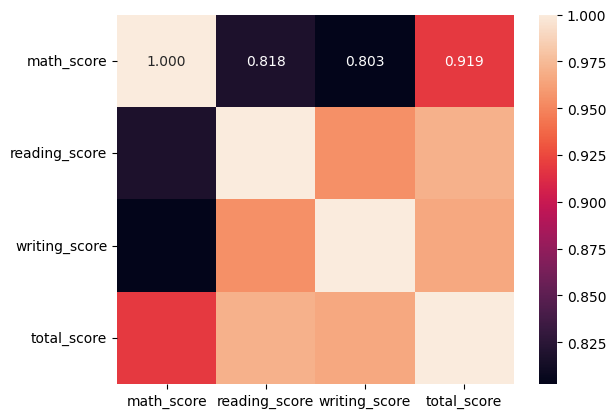

In [76]:
import seaborn as sns
sns.heatmap(stud_corr,annot=True,fmt='.3f')

# Question 4 : Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model.

## Answer :

### Feature engineering is the process of selecting and transforming variables in order to improve the performance of a machine learning model. In the context of the student performance dataset, feature engineering would involve selecting and transforming the variables in order to predict students' performance on exams.

### Here are the steps that could be taken for feature engineering in the context of the student performance dataset:

1. `Data cleaning`: Before feature engineering can begin, the data should be cleaned to remove any missing values, inconsistencies, or outliers. This could involve imputing missing values, correcting errors, and removing outliers.

2. `Feature selection`: The next step is to select the variables that are most relevant for predicting exam performance. This could involve examining the correlation between each variable and the target variable (total score), as well as considering domain knowledge and previous research. For example, variables such as math score, reading score, writing score, and test preparation course may be highly relevant for predicting exam performance.

3. `Feature transformation`: Once the relevant variables have been selected, they may need to be transformed in order to improve their predictive power. This could involve creating new variables from existing ones, such as calculating the average of the math, reading, and writing scores, or creating a binary variable to indicate whether or not a student completed a test preparation course. Other transformations could include scaling or standardizing the variables to ensure that they are on the same scale.

4. `Feature engineering iterations`: The feature engineering process is often an iterative one, where the data scientist goes back and forth between selecting and transforming variables until the model performance is optimized. This may involve trying different transformations, selecting different variables, or even collecting additional data.

### Overall, the goal of feature engineering in the context of the student performance dataset would be to create a set of variables that accurately predict students' performance on exams. This would involve selecting relevant variables, transforming them as needed, and iteratively refining the feature set until the model performance is optimized.

### Below is my detailed approach in python

In [80]:
# Read the dataset
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/neerajprasad209/Dataset/main/StudentsPerformance.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [81]:
# Checking Missing values in dataset
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [82]:
# Checking duplicates in dataset 
df.duplicated().sum()

0

### No duplicates and Missing values found in dataset

In [83]:
# Feature Engineering : Adding Total Score column and Average in dataset
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [84]:
# Assuming Average score as Target Variable defining X and Y
X = df.drop(labels=['math_score','reading_score','writing_score','total_score','average'],axis=1)
Y = df[['average']]

In [85]:
# Seperating Categorical and Numerical features
cat_cols = list(X.select_dtypes(include='object').columns)
num_cols = list(X.select_dtypes(exclude='object').columns)
print(f'Categorical Columns : {cat_cols}')
print(f'Numerical Columns : {num_cols}')

Categorical Columns : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
Numerical Columns : []


In [86]:
# One Hot Encoding of Categorical Variables 
X_cat = pd.get_dummies(X[cat_cols])
X_cat.head()

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True


In [87]:
# Train Test split on dataset
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_cat, Y, test_size=0.2, random_state=42)

In [88]:
xtrain.shape

(800, 17)

In [89]:
xtest.shape

(200, 17)

In [90]:
# Perform Standard Scaler on Entire dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [91]:
xtrain.head()

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,0.948808,-0.948808,-0.307232,-0.486288,-0.693889,1.720580,-0.411814,-0.536884,-0.369274,-0.498046,4.002659,-0.542677,-0.454573,-0.727761,0.727761,-0.731785,0.731785
1,0.948808,-0.948808,-0.307232,-0.486288,1.441153,-0.581199,-0.411814,-0.536884,2.708013,-0.498046,-0.249834,-0.542677,-0.454573,1.374077,-1.374077,1.366522,-1.366522
2,0.948808,-0.948808,-0.307232,-0.486288,-0.693889,1.720580,-0.411814,-0.536884,-0.369274,-0.498046,-0.249834,1.842717,-0.454573,1.374077,-1.374077,-0.731785,0.731785
3,-1.053953,1.053953,-0.307232,-0.486288,1.441153,-0.581199,-0.411814,-0.536884,-0.369274,-0.498046,4.002659,-0.542677,-0.454573,1.374077,-1.374077,-0.731785,0.731785
4,-1.053953,1.053953,-0.307232,-0.486288,-0.693889,-0.581199,2.428282,-0.536884,-0.369274,2.007846,-0.249834,-0.542677,-0.454573,-0.727761,0.727761,-0.731785,0.731785


In [92]:
xtest.head()

,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,0.948808,-0.948808,-0.307232,-0.486288,1.441153,-0.581199,-0.411814,1.862599,-0.369274,-0.498046,-0.249834,-0.542677,-0.454573,-0.727761,0.727761,-0.731785,0.731785
1,0.948808,-0.948808,-0.307232,2.056394,-0.693889,-0.581199,-0.411814,-0.536884,-0.369274,-0.498046,-0.249834,1.842717,-0.454573,1.374077,-1.374077,1.366522,-1.366522
2,-1.053953,1.053953,-0.307232,-0.486288,-0.693889,1.720580,-0.411814,-0.536884,2.708013,-0.498046,-0.249834,-0.542677,-0.454573,-0.727761,0.727761,-0.731785,0.731785
3,-1.053953,1.053953,-0.307232,-0.486288,1.441153,-0.581199,-0.411814,-0.536884,-0.369274,-0.498046,-0.249834,1.842717,-0.454573,1.374077,-1.374077,-0.731785,0.731785
4,-1.053953,1.053953,-0.307232,-0.486288,-0.693889,-0.581199,2.428282,-0.536884,-0.369274,-0.498046,-0.249834,1.842717,-0.454573,-0.727761,0.727761,1.366522,-1.366522


### Above Data is now ready for Model Training

# Question 5 : Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to these features to improve normality?

## Answer :

In [93]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/neerajprasad209/Dataset/main/wine%2Bquality/winequality-white.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [95]:
# Checking Missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [96]:
# Checking Duplicated Values
df.duplicated().sum()

937

In [97]:
# Dropping the duplicated columns
df = df.drop_duplicates(keep='first')
df.shape

(3961, 12)

In [98]:
## function to plot QQ plots to check normality
import scipy.stats as stat
import pylab
import seaborn as sns
import matplotlib.pyplot as plt
def qq_plot(df, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True)
    plt.title(f'Histogram Plot for : {feature}')
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(f'Q-Q Plot for : {feature}')
    plt.show()

Feature : fixed acidity


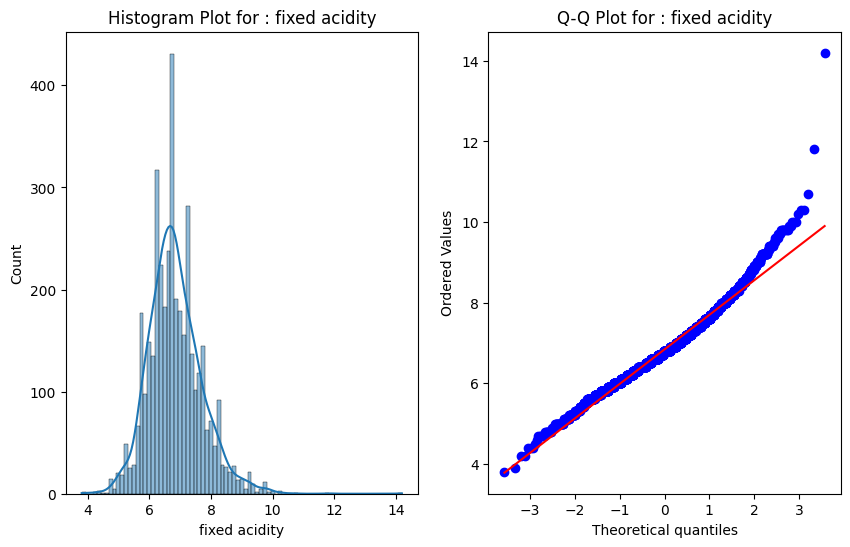



Feature : volatile acidity


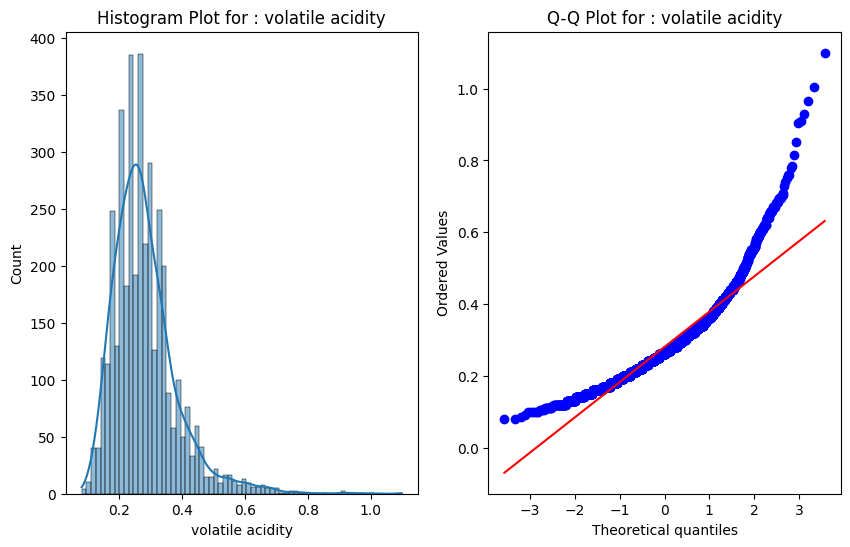



Feature : citric acid


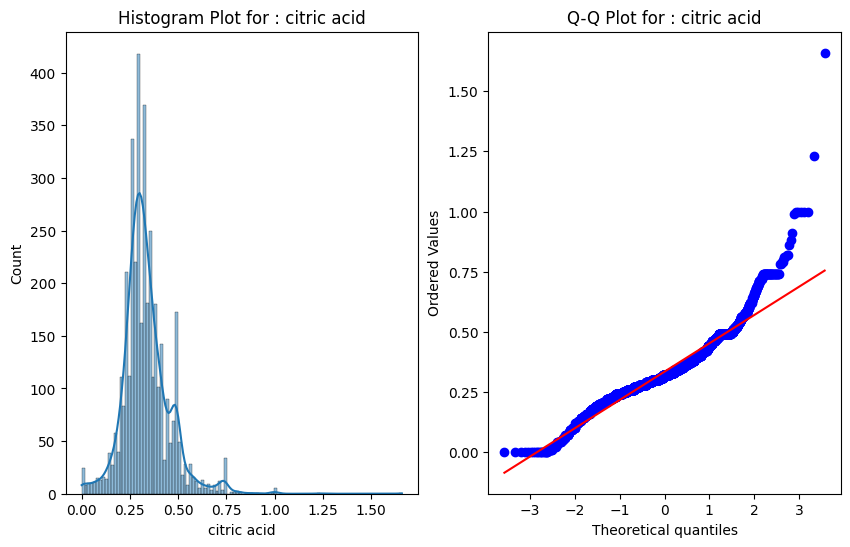



Feature : residual sugar


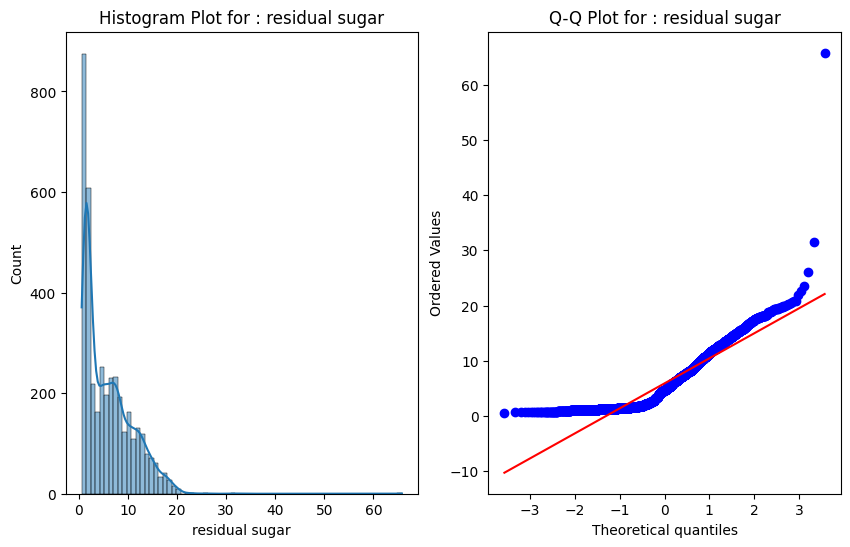



Feature : chlorides


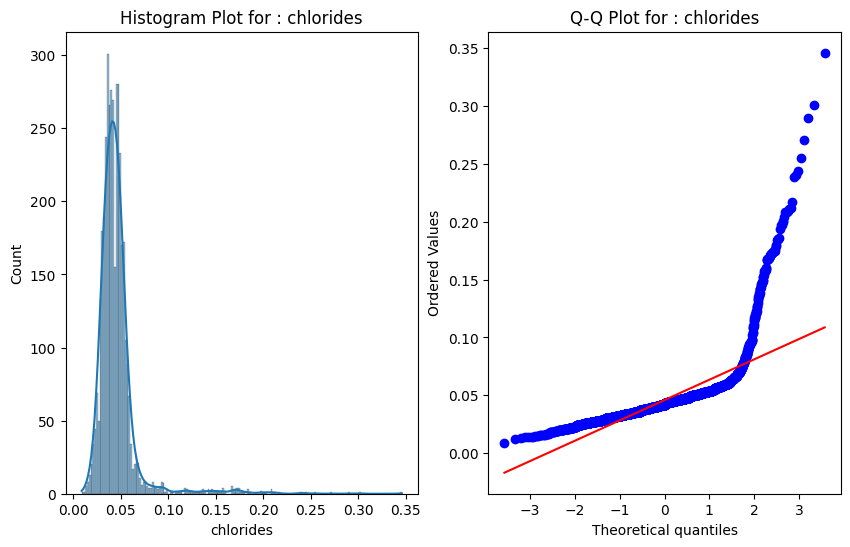



Feature : free sulfur dioxide


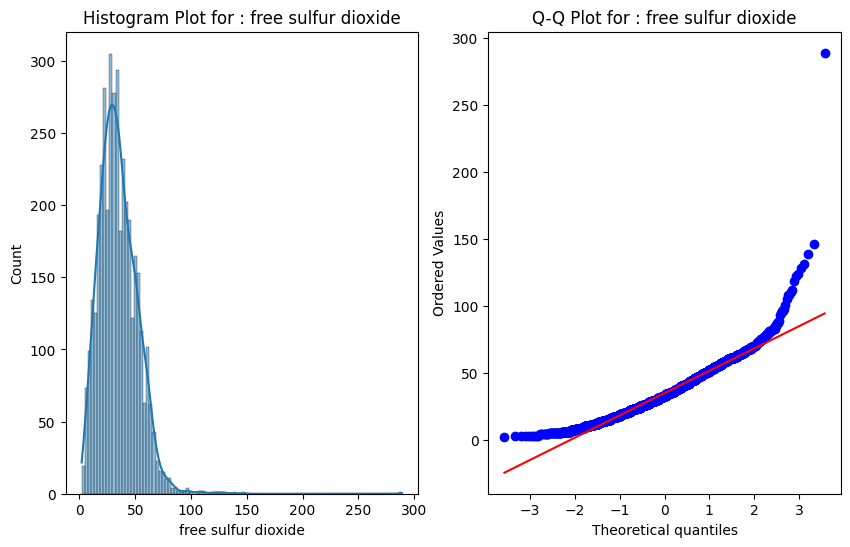



Feature : total sulfur dioxide


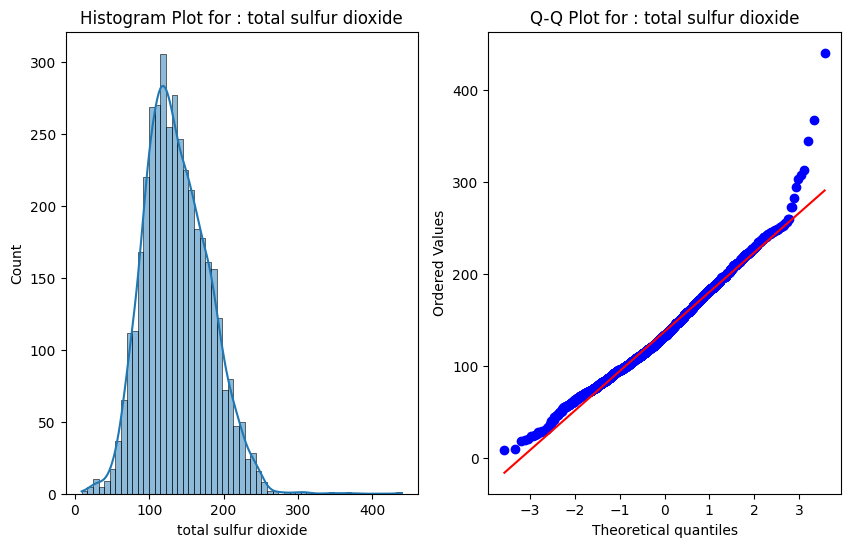



Feature : density


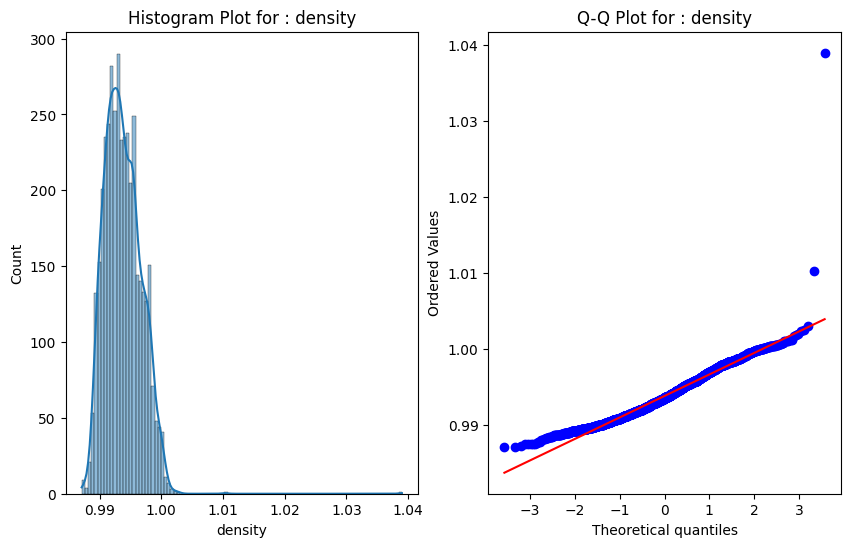



Feature : pH


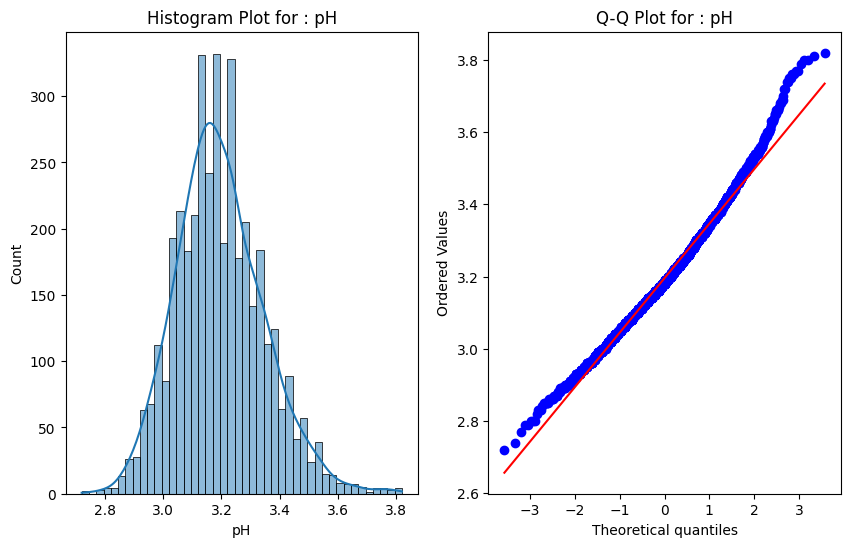



Feature : sulphates


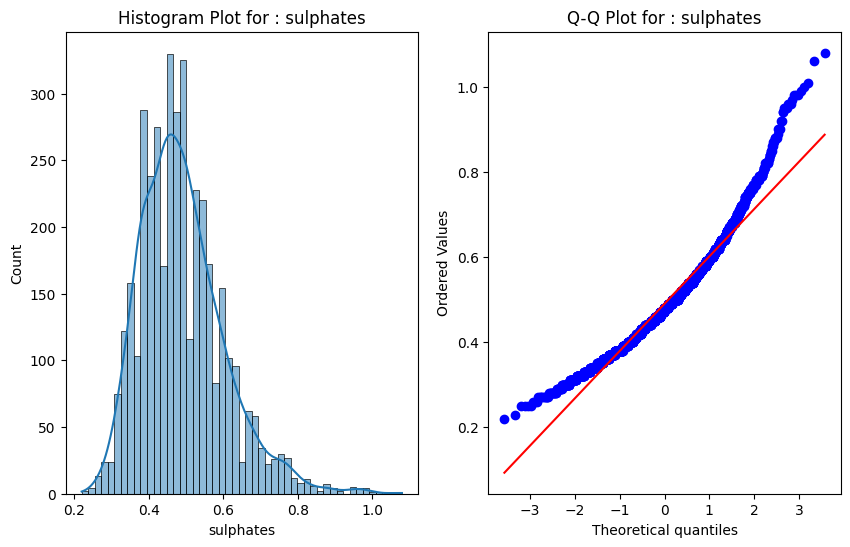



Feature : alcohol


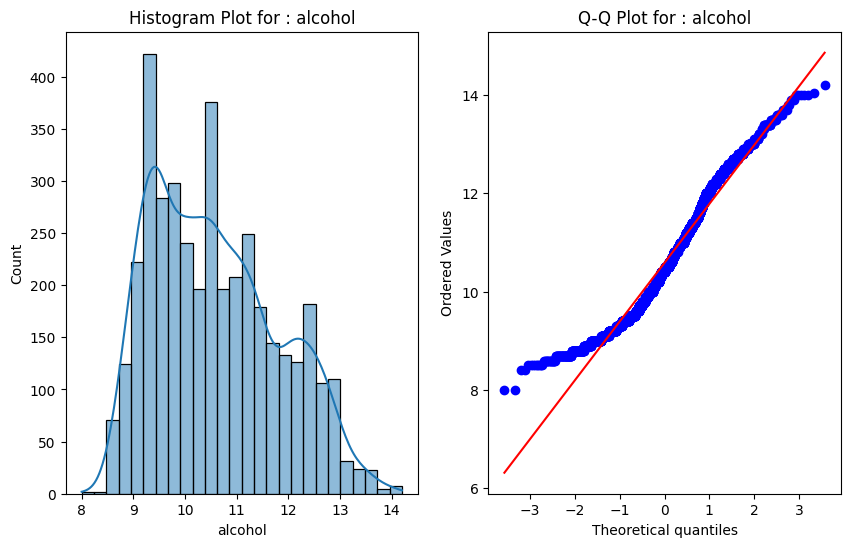



Feature : quality


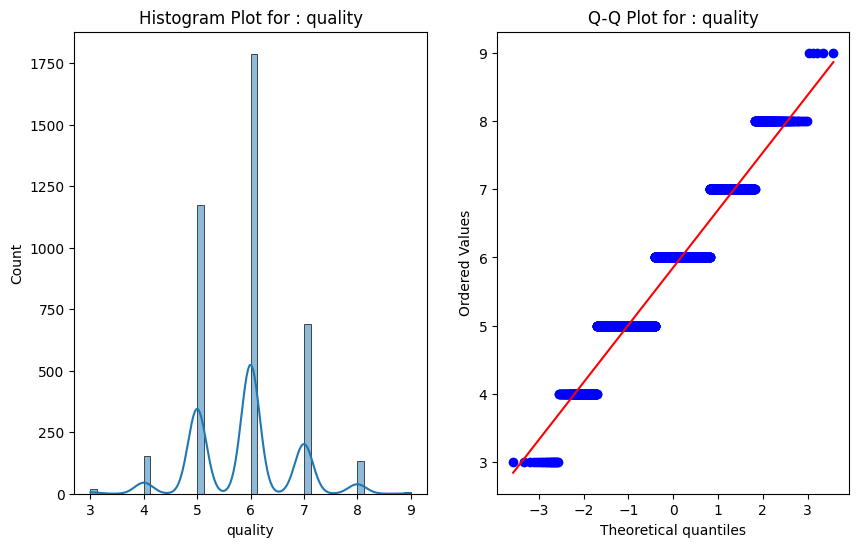

In [99]:
## Iterate QQ plot on each of variable 
for col in df.columns:
    print(f'Feature : {col}')
    qq_plot(df,col)
    print('\n'+'='*100 + '\n')

In [100]:
df.skew()

fixed acidity           0.696100
volatile acidity        1.641081
citric acid             1.310601
residual sugar          1.333639
chlorides               4.969076
free sulfur dioxide     1.566680
total sulfur dioxide    0.456800
density                 1.273318
pH                      0.455457
sulphates               0.937853
alcohol                 0.450697
quality                 0.112004
dtype: float64

### Observations : All Features look Right (Positively) Skewed Except `density`, `pH` and `quality` are Normally distributed

### To improve normality, we could apply various transformations such as:

1. `Log transformation`: This could be applied to the "residual sugar" feature to reduce the skewness.

2. `Square root transformation`: This could be applied to the "density" feature to reduce the skewness.

3. `Box-Cox transformation`: This is a more general transformation that can be used to transform a variety of non-normal distributions to normality. It involves finding the optimal lambda value that maximizes the log-likelihood of the data under a Box-Cox transformation. The Scipy library in Python provides a function for calculating the Box-Cox transformation.

### It's important to note that not all non-normal distributions need to be transformed. In some cases, non-normality may not significantly impact the performance of a machine learning model, and therefore it may not be necessary to transform the data.

# Question 6 : Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of features. What is the minimum number of principal components required to explain 90% of the variance in the data?

## Answer :

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.3 KB


### All values are numerical in nature hence no need to perform categorical variable feature engineering

### Step 1 : Seperate X and Y Variables in dataset

In [103]:
X = df.drop(labels=['quality'],axis=1)
Y = df[['quality']]

### Step 2: Train Test Split of Data

In [104]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=56)

In [105]:
xtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2136,7.9,0.18,0.36,5.9,0.058,31.0,132.0,0.99500,3.25,0.52,10.9
1225,6.8,0.32,0.37,3.4,0.023,19.0,87.0,0.99020,3.14,0.53,12.7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8
1741,7.7,0.38,0.40,2.0,0.038,28.0,152.0,0.99060,3.18,0.32,12.9
2764,7.9,0.16,0.30,7.4,0.050,58.0,152.0,0.99612,3.12,0.37,9.5


In [106]:
xtest.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2639,9.2,0.14,0.37,1.1,0.034,36.0,84.0,0.99136,3.05,0.55,11.6
204,5.8,0.28,0.35,2.3,0.053,36.0,114.0,0.99240,3.28,0.50,10.2
2397,6.5,0.19,0.27,4.9,0.037,13.0,101.0,0.99160,3.17,0.41,11.8
2982,7.0,0.20,0.31,8.0,0.050,29.0,213.0,0.99596,3.28,0.57,10.4
1745,6.1,0.34,0.31,12.0,0.053,46.0,238.0,0.99770,3.16,0.48,8.6


### Step 3 : Perform Standard Scaling (Z-score scaling)

In [107]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [108]:
xtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1.220663,-0.973810,0.215316,-0.004084,0.525827,-0.235676,-0.131777,0.414509,0.348220,0.258326,0.252916
1,-0.039078,0.380525,0.297629,-0.514614,-0.991077,-0.936208,-1.185341,-1.223155,-0.375164,0.345684,1.743698
2,-0.955253,-0.683595,0.379941,-1.045566,-1.121097,-0.761075,-0.927803,-1.492688,0.413982,-1.488846,0.998307
3,0.991619,0.960954,0.544566,-0.800511,-0.340975,-0.410809,0.336474,-1.086683,-0.112115,-1.488846,1.909341
4,1.220663,-1.167286,-0.278558,0.302235,0.179106,1.340521,0.336474,0.796631,-0.506688,-1.052053,-0.906581


In [109]:
xtest.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.709448,-1.360763,0.297629,-0.984302,-0.514336,0.056212,-1.255579,-0.827387,-0.967023,0.520401,0.832665
1,-1.184297,-0.006428,0.133004,-0.739247,0.309127,0.056212,-0.553202,-0.472559,0.545506,0.083608,-0.326833
2,-0.382643,-0.877072,-0.525495,-0.208296,-0.384315,-1.286474,-0.857565,-0.745503,-0.177877,-0.702619,0.998307
3,0.189966,-0.780333,-0.196245,0.424762,0.179106,-0.352431,1.764639,0.742042,0.545506,0.695119,-0.161190
4,-0.840731,0.574001,-0.196245,1.241610,0.309127,0.639989,2.349952,1.335695,-0.243640,-0.091109,-1.651973


### Step 4 : Perform Principal Component Analysis PCA

In [110]:
from sklearn.decomposition import PCA
pca = PCA(0.90)
pca.fit(xtrain)
output_cols = pca.get_feature_names_out()
print(f'Output Columns : {output_cols}')
print(f'Explained Variance :{pca.explained_variance_ratio_}')

Output Columns : ['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7']
Explained Variance :[0.29022941 0.14551466 0.11068262 0.09450266 0.08758915 0.0835588
 0.0657043  0.05479498]


In [111]:
pca.explained_variance_ratio_.sum()

0.9325765785247967

In [112]:
# Transforming xtrain and xtest
xtrain_pca = pd.DataFrame(pca.transform(xtrain),columns=output_cols)
xtest_pca = pd.DataFrame(pca.transform(xtest),columns=output_cols)

In [113]:
xtrain_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,0.266167,-0.709331,-0.802291,0.402723,-0.244219,-0.570281,-0.213218,0.548394
1,-2.451290,-0.840025,-0.073837,-0.103561,1.135678,-0.043437,0.461998,-0.562464
2,-2.735948,-0.174077,-0.312082,-1.111124,-0.891281,0.112775,0.902095,0.177946
3,-1.541887,-1.255548,0.488839,-0.609190,0.635016,1.565791,0.956567,1.085336
4,1.620923,-0.659757,-0.478967,-1.175443,-1.104620,0.264493,-0.973300,0.616621


In [114]:
xtest_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7
0,-1.210751,-2.557619,-1.652673,-0.126632,0.489000,-0.108915,-1.338929,0.592526
1,-0.797910,0.841302,-0.150786,0.587967,-0.730409,0.116481,0.329982,-0.242854
2,-1.916055,-0.482949,0.202536,-0.546182,-0.614986,-0.626821,-0.069469,-0.401205
3,1.238524,0.713352,-0.657836,0.257837,0.261693,-0.505213,-0.350965,0.489686
4,3.015482,1.282016,0.728496,-0.275059,-0.032233,0.293793,-0.084818,-0.096843


In [115]:
print(f'Minimum Number of components required to explain 90% variance is {xtrain_pca.shape[1]}')

Minimum Number of components required to explain 90% variance is 8


### PCA is completed minimum 7 components are required to explain 90% variance